# I'll try to make this, god bless me

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

сгенерируем случайную выборку из экспоненциального распределения и получим эмпирические данные:

In [5]:
baby_sample = np.random.exponential(3, size = 1000)

посмотрим, как сгенерированные данные визуализируются:

Text(0.5, 0, '$x$')

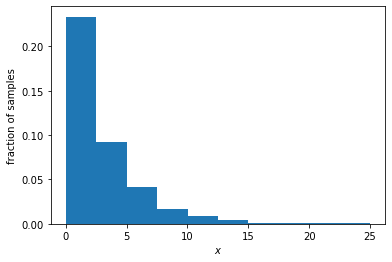

In [6]:
baby_hist = plt.hist(baby_sample, density=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

На гистограмме действительно видно экспоненциальное распределение. Сработало!
Теперь посмотрим на эмпирическую функцию распределения (спойлер: с данными все сходится!).

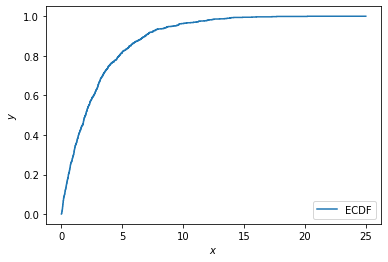

In [7]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(baby_sample)
plt.step(ecdf.x, ecdf.y, label='ECDF')

plt.ylabel('$y$')
plt.xlabel('$x$')
plt.legend(loc='lower right')

перейдем к теоретическому распределению

Text(0.5, 0, '$x$')

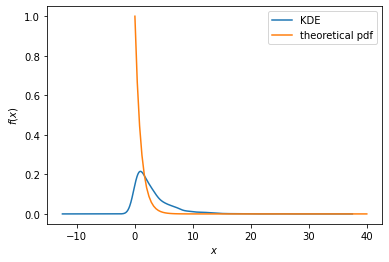

In [24]:
# для построения используем библиотеку Pandas:
x = np.linspace(0, 10, 100)
y = np.linspace(0, 100, 100)
#df = pd.DataFrame(baby_sample, columns=['KDE'])
ax = df.plot(kind='density')

# на том же графике построим теоретическую плотность распределения:
x = np.linspace(0,40,100)
y = np.linspace(0, 1, 100)
pdf = sts.expon.pdf(x)
plt.plot(x, pdf, label='theoretical pdf')
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

получили сравнение теории и практики :)
Если честно, кривоватенько, но а) идею-то передает, б) ну уж как пока умею рисовать :(

Приступим к извлечению выборочных средних, которые должны образовать нормальное распределение

In [69]:
# опишем функцию, которая для объема выборки n генерирует график гистограммы выборочных средних случайной величины
# и теоретической оценки плотности вероятности для распределения выборочных средних

def generate_pdf(n): 
    # сгенерируем выборочные средние по выборкам объема n
    means = []
    for _ in range(1000):
        sample = np.random.exponential(3, size = 1000)
        sample_mean = np.mean(sample)
        means.append(sample_mean)
    
    # расчитаем теоритеческую плотность вероятности (pdf - probability density function) для нормального распределения
    mu = 1 # theoretical expectation
    sigma = (1./n) ** 0.5 # theoretical sigma
    norm_rv = sts.norm(loc=mu, scale=sigma)
    x = np.linspace(0,4,100)
    pdf = norm_rv.pdf(x)
    
    # построим гистограмму выборочных средних и наложим на нее теоретическую 
    # оценку плотности вероятности нормального распределения
    plt.plot(x, pdf, linewidth = 2.5)
    plt.hist(means, normed = True)
    plt.xlabel('$\\bar{X}_n$')
    plt.ylabel('$f(\\bar{X}_n)$')
    plt.title('n = %d' % n)
    plt.show()

на некоторых версиях питона в гистограмме не работает normed=True......

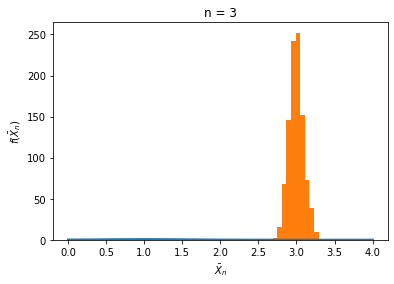

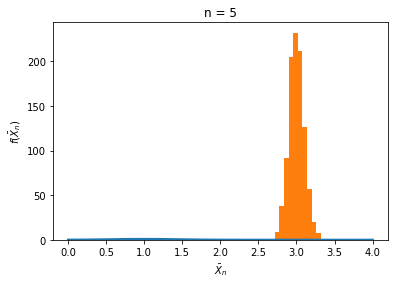

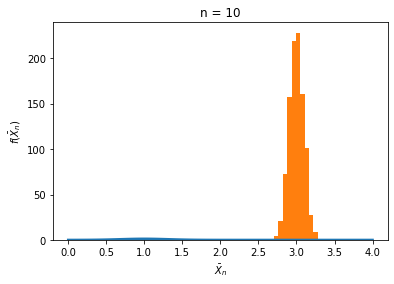

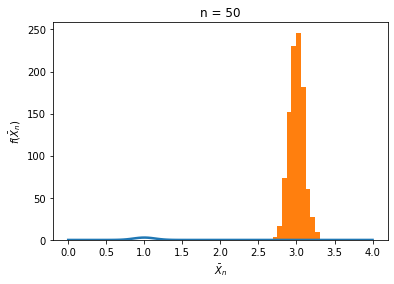

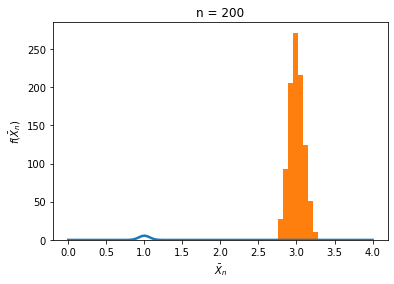

In [70]:
# построим гистограммы распределений выборочных средних и приближающих их нормальных распределений 
# при различных объемах выборок n
for n in [3, 5, 10, 50, 200]:
    generate_pdf(n)

*ИТОГО*
Повторили ЦПТ: при увеличении выборки распределение средних действиетльно все больше и больше становится нормальным